In [0]:

# -*- coding: utf-8 -*-
"""
Created on Sat Oct 26 21:23:39 2019

@author: Roger Perez Molera

Intel_Challenge
Image_Classification
CNN
"""

import pickle

from pathlib import Path
from skimage import io

#To resize images
from skimage.transform import resize

import pandas as pd
import numpy as np

#To achieve pathnames easily
import glob

#Version of GREB
import re

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

# import keras library

import keras


# import Sequential from the keras models module

from keras.models import Sequential
# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D



In [0]:

Address='/content/Intel_Challenge/'

# load an image and explore
example_image = io.imread(Address+'seg_train/seg_train/buildings/{}.jpg'.format(0))
#Show Image
plt.imshow(example_image)
# print shape
dimensions=example_image.shape
print('Example image has shape: ', dimensions)
                    
# print color channel values for top left pixel
print('RGB values for the top left pixel are:', example_image[0,0,])

# initialize standard scaler
ss = StandardScaler()


In [0]:
#TRAIN SET
#Import a list of Images

image_list_Buildings = []
image_list_Forest = []
image_list_Glacier = []
image_list_Mountain = []
image_list_Sea = []
image_list_Street = []


Image_addresses=glob.glob(Address+'seg_train/seg_train/*/*')
image_list = []
contador=0
labels_train = np.zeros(shape=(len(Image_addresses)))

for filename in Image_addresses:
    match_b=re.search('buildings',filename)
    match_f=re.search('forest',filename)
    match_g=re.search('glacier',filename)
    match_m=re.search('mountain',filename)
    match_s=re.search('sea',filename)
    match_st=re.search('street',filename)
    

    if match_b:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_train[contador]=1
        # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])        
    if match_f:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_train[contador]=2
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    if match_g:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_train[contador]=3
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    if match_m:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_train[contador]=4
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    if match_s:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_train[contador]=5
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    if match_st:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_train[contador]=6
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])        
        
    contador=contador+1
    image_list.append(img)

# convert image list to single array
X_train = np.array(image_list) 

# print shape of X
print(X_train.shape)
print(labels_train.shape)

#Divide train set to evaluate the model
sub_arr=np.split(X_train,:10000)
sub_arr_label= np.split(labels_train,:10000)


#TEST SET
#Import a list of Images

image_list = []
contador=0
Image_addresses=glob.glob(Address+'seg_test/seg_test/*/*')
labels_test = np.zeros(shape=(len(Image_addresses)))

for filename in Image_addresses:
    match_b=re.search('buildings',filename)
    match_f=re.search('forest',filename)
    match_g=re.search('glacier',filename)
    match_m=re.search('mountain',filename)
    match_s=re.search('sea',filename)
    match_st=re.search('street',filename)
    

  
    if match_b:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_test[contador]=1
        # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])        
    if match_f:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_test[contador]=2
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    if match_g:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_test[contador]=3
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    if match_m:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_test[contador]=4
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    if match_s:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_test[contador]=5
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    if match_st:
        img = io.imread(filename).astype(np.float64)
        if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
        labels_test[contador]=6
         # for each channel, apply standard scaler's fit_transform method
        for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])        
        
    contador=contador+1
    image_list.append(img)

# convert image list to single array
X_test = np.array(image_list) 

# print shape of X
print(X_test.shape)
print(labels_test.shape)


#PREDICTION SET

image_list = []
Image_addresses=glob.glob(Address+'seg_pred/seg_pred/*')

for filename in Image_addresses:
    img = io.imread(filename).astype(np.float64)
    if (img.shape[0] != 150) or (img.shape[1] != 150):
            img =resize(img,(150,150))
    for channel in range(img.shape[2]): 
            img[:, :, channel] = ss.fit_transform(img[:, :, channel])
    
    image_list.append(img)
    

X_pred = np.stack(image_list, axis=0)  #Join a sequence of arrays along a new axis.
print(X_pred.shape)


In [0]:


#LABEL ENCODER
lb = LabelBinarizer()
labels_train = lb.fit_transform(labels_train)
labels_test = lb.fit_transform(labels_test)


#MODEL BUILDING

# set model constants
num_classes = 6

# define model as Sequential
model = Sequential()

# first convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))

# add a second 2D convolutional layer with 64 filters

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))


# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size=(2,2),input_shape=(150, 150, 3)))

# third convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))

# add additional dropout to prevent overfitting

model.add(Dropout(0.5))

# prediction layers
model.add(Dense(num_classes, activation="softmax", name='preds'))

# show model summary

model.summary()


model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)

In [0]:



# mock-train the model using the first ten observations of the train and test sets
history=model.fit(
    X_train,
    labels_train,
    epochs=5,
    verbose=1,
    validation_data=(X_test, labels_test)
)

print(X_train[3].shape)
print(X_train.shape)
print(X_train[0])

#Save the model
model.save('Intel_Challenge_CNN_1') 

# load pre-trained model
#pretrained_cnn = keras.models.load_model('datasets/pretrained_model.h5')

# evaluate model on test set
score = model.evaluate(X_test, labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("")




dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


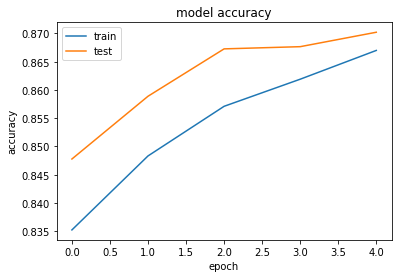

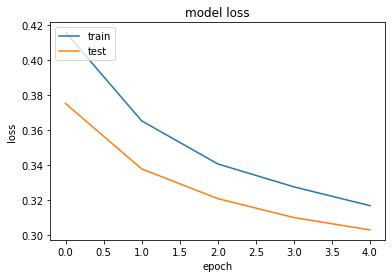

In [103]:

# list all data in history
print(history.history.keys())


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        8.369322e-37, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 5.872596e-10, 0.000000e+00,
        1.000000e+00, 0.000000e+00]], dtype=float32)

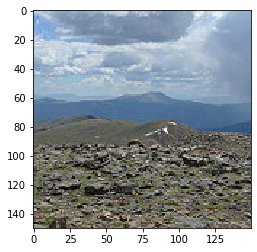

In [119]:
# load an image and explore
example_image = io.imread(Address+'seg_test/seg_test/buildings/{}.jpg'.format(20057))
example_image1 = io.imread(Address+'seg_test/seg_test/mountain/{}.jpg'.format(20545))

#example_image =resize(example_image,(150,150))
#example_image1 =resize(example_image1,(150,150))
image_list = []

image_list.append(example_image)
image_list.append(example_image1)

X_Predictions = np.array(image_list)

#Show Image

plt.imshow(example_image1)
model.predict(X_Predictions)

#Image_addresses=glob.glob(Address+'seg_test/seg_test/*/*')
#print(Image_addresses[2890])
#print(labels_test[2890])
